In [ ]:
# pip install pysqlite3
import sqlite3

In [ ]:
connection = sqlite3.connect("mysql.db")

In [ ]:
connection

In [ ]:
create_table_query  = """
CREATE TABLE IF NOT EXISTS employees(
emp_id INTEGER PRIMARY KEY,
first_name TEXT NOT NULL,
last_name TEXT NOT NULL,
email TEXT UNIQUE NOT NULL,
hire_date TEXT NOT NULL,
salary REAL NOT NULL);
"""

In [ ]:

table_creation_query2="""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL,
    phone TEXT
);
"""

In [ ]:

table_creation_query3="""
CREATE TABLE IF NOT EXISTS orders (
    order_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    amount REAL NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
);

"""

In [ ]:
cursor = connection.cursor()
cursor

In [ ]:
cursor.execute(create_table_query)
cursor.execute(table_creation_query2)
cursor.execute(table_creation_query3)

In [ ]:
insert_query = """
INSERT INTO employees (emp_id, first_name, last_name, email, hire_date, salary)
VALUES (?, ?, ?, ?, ?, ?);
"""

insert_query_customers = """
INSERT INTO customers (customer_id, first_name, last_name, email, phone)
VALUES (?, ?, ?, ?, ?);
"""

insert_query_orders = """
INSERT INTO orders (order_id, customer_id, order_date, amount)
VALUES (?, ?, ?, ?);
"""

In [ ]:
employee_data = [
    (1, "Sunny", "Savita", "sunny.sv@abc.com", "2023-06-01", 50000.00),
    (2, "Arhun", "Meheta", "arhun.m@gmail.com", "2022-04-15", 60000.00),
    (3, "Alice", "Johnson", "alice.johnson@jpg.com", "2021-09-30", 55000.00),
    (4, "Bob", "Brown", "bob.brown@uio.com", "2020-01-20", 45000.00),
    ]

customers_data = [
    (1, "John", "Doe", "john.doe@example.com", "1234567890"),
    (2, "Jane", "Smith", "jane.smith@example.com", "9876543210"),
    (3, "Emily", "Davis", "emily.davis@example.com", "4567891230"),
    (4, "Michael", "Brown", "michael.brown@example.com", "7894561230"),
]

orders_data = [
    (1, 1, "2023-12-01", 250.75),
    (2, 2, "2023-11-20", 150.50),
    (3, 3, "2023-11-25", 300.00),
    (4, 4, "2023-12-02", 450.00),
]

In [ ]:
cursor.executemany(insert_query,employee_data)
cursor.executemany(insert_query_customers,customers_data)
cursor.executemany(insert_query_orders,orders_data)

In [ ]:
connection.commit()

In [ ]:
cursor.execute("select * from orders;")

In [ ]:
cursor.description


In [ ]:
cursor.execute("select * from orders")

In [ ]:
for row in cursor.fetchall():
    print(row)

In [1]:
from langchain_community.utilities import SQLDatabase  # to connect your databases


db = SQLDatabase.from_uri("sqlite:///mysql.db")

In [2]:
db.table_info

'\nCREATE TABLE customers (\n\tcustomer_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\tphone TEXT, \n\tPRIMARY KEY (customer_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from customers table:\ncustomer_id\tfirst_name\tlast_name\temail\tphone\n1\tJohn\tDoe\tjohn.doe@example.com\t1234567890\n2\tJane\tSmith\tjane.smith@example.com\t9876543210\n3\tEmily\tDavis\temily.davis@example.com\t4567891230\n*/\n\n\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/\n\n\nCREATE TABLE orders (\n\torder_id I

In [3]:
db.dialect # what is mean by dialect >>> it tell the type of database like sqlite or postgresql or other

db.run("SELECT * FROM ORDERS")


"[(1, 1, '2023-12-01', 250.75), (2, 2, '2023-11-20', 150.5), (3, 3, '2023-11-25', 300.0), (4, 4, '2023-12-02', 450.0)]"

In [4]:
db.get_context()

{'table_info': '\nCREATE TABLE customers (\n\tcustomer_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\tphone TEXT, \n\tPRIMARY KEY (customer_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from customers table:\ncustomer_id\tfirst_name\tlast_name\temail\tphone\n1\tJohn\tDoe\tjohn.doe@example.com\t1234567890\n2\tJane\tSmith\tjane.smith@example.com\t9876543210\n3\tEmily\tDavis\temily.davis@example.com\t4567891230\n*/\n\n\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/\n\n\nCREATE TABLE orders 

In [5]:
db.get_usable_table_names()

['customers', 'employees', 'orders']

In [6]:
db.get_table_info()

'\nCREATE TABLE customers (\n\tcustomer_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\tphone TEXT, \n\tPRIMARY KEY (customer_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from customers table:\ncustomer_id\tfirst_name\tlast_name\temail\tphone\n1\tJohn\tDoe\tjohn.doe@example.com\t1234567890\n2\tJane\tSmith\tjane.smith@example.com\t9876543210\n3\tEmily\tDavis\temily.davis@example.com\t4567891230\n*/\n\n\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/\n\n\nCREATE TABLE orders (\n\torder_id I

In [7]:
db.get_table_info_no_throw()

'\nCREATE TABLE customers (\n\tcustomer_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\tphone TEXT, \n\tPRIMARY KEY (customer_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from customers table:\ncustomer_id\tfirst_name\tlast_name\temail\tphone\n1\tJohn\tDoe\tjohn.doe@example.com\t1234567890\n2\tJane\tSmith\tjane.smith@example.com\t9876543210\n3\tEmily\tDavis\temily.davis@example.com\t4567891230\n*/\n\n\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/\n\n\nCREATE TABLE orders (\n\torder_id I

In [8]:
db.run_no_throw

<bound method SQLDatabase.run_no_throw of <langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>>

In [9]:
db.run("select * from customers")

"[(1, 'John', 'Doe', 'john.doe@example.com', '1234567890'), (2, 'Jane', 'Smith', 'jane.smith@example.com', '9876543210'), (3, 'Emily', 'Davis', 'emily.davis@example.com', '4567891230'), (4, 'Michael', 'Brown', 'michael.brown@example.com', '7894561230')]"

In [117]:
pip freeze>requirement.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langchain_groq import ChatGroq
 
import os

from dotenv import load_dotenv

load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
groq_llm = ChatGroq(model="llama3-70b-8192")




In [11]:
groq_llm = ChatGroq(model="llama3-70b-8192")

In [12]:
groq_llm.invoke("hey there")

AIMessage(content="Hey there! It's nice to meet you. Is there something I can help you with, or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 12, 'total_tokens': 39, 'completion_time': 0.077142857, 'prompt_time': 0.000118348, 'queue_time': 0.052721672000000004, 'total_time': 0.077261205}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--0b7be8c6-bc04-4c1c-b730-dba9d887b54b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 27, 'total_tokens': 39})

In [13]:
from langchain_community.agent_toolkits import SQLDatabaseToolkit # it has multiple tools wrapper in side 


In [ ]:
toolkit = SQLDatabaseToolkit(db=db,llm=groq_llm)


In [15]:
for j in toolkit:
    print(j)

('db', <langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>)
('llm', ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000222DABFCAD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000222DC8BF620>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********')))


In [16]:
toolkit.get_context()

{'table_info': '\nCREATE TABLE customers (\n\tcustomer_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\tphone TEXT, \n\tPRIMARY KEY (customer_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from customers table:\ncustomer_id\tfirst_name\tlast_name\temail\tphone\n1\tJohn\tDoe\tjohn.doe@example.com\t1234567890\n2\tJane\tSmith\tjane.smith@example.com\t9876543210\n3\tEmily\tDavis\temily.davis@example.com\t4567891230\n*/\n\n\nCREATE TABLE employees (\n\temp_id INTEGER, \n\tfirst_name TEXT NOT NULL, \n\tlast_name TEXT NOT NULL, \n\temail TEXT NOT NULL, \n\thire_date TEXT NOT NULL, \n\tsalary REAL NOT NULL, \n\tPRIMARY KEY (emp_id), \n\tUNIQUE (email)\n)\n\n/*\n3 rows from employees table:\nemp_id\tfirst_name\tlast_name\temail\thire_date\tsalary\n1\tSunny\tSavita\tsunny.sv@abc.com\t2023-06-01\t50000.0\n2\tArhun\tMeheta\tarhun.m@gmail.com\t2022-04-15\t60000.0\n3\tAlice\tJohnson\talice.johnson@jpg.com\t2021-09-30\t55000.0\n*/\n\n\nCREATE TABLE orders 

In [17]:
tools = toolkit.get_tools()
tools


# it has the multiple tool desinged inside the



[QuerySQLDatabaseTool(description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields.", db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>),
 InfoSQLDatabaseTool(description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3', db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>),
 ListSQLDatabaseTool(db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>),
 QuerySQLCheckerTool(description='Use this tool to 

In [18]:
for j in  tools:
    print("Tools : ",j.name)
    print(j)
    print("*"*100)
    print()

Tools :  sql_db_query
description="Input to this tool is a detailed and correct SQL query, output is a result from the database. If the query is not correct, an error message will be returned. If an error is returned, rewrite the query, check the query, and try again. If you encounter an issue with Unknown column 'xxxx' in 'field list', use sql_db_schema to query the correct table fields." db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>
****************************************************************************************************

Tools :  sql_db_schema
description='Input to this tool is a comma-separated list of tables, output is the schema and sample rows for those tables. Be sure that the tables actually exist by calling sql_db_list_tables first! Example Input: table1, table2, table3' db=<langchain_community.utilities.sql_database.SQLDatabase object at 0x00000222D87CC080>
*****************************************************************

# Tools :  sql_db_list_tables

In [19]:
list_tables_tool = next((tool for tool in tools if tool.name == "sql_db_list_tables"), None)

list_tables_tool.invoke("tables")

'customers, employees, orders'

In [20]:
get_schema_tool = next((tool for tool in tools if tool.name == "sql_db_schema"), None)
print(get_schema_tool.invoke("employees"))


CREATE TABLE employees (
	emp_id INTEGER, 
	first_name TEXT NOT NULL, 
	last_name TEXT NOT NULL, 
	email TEXT NOT NULL, 
	hire_date TEXT NOT NULL, 
	salary REAL NOT NULL, 
	PRIMARY KEY (emp_id), 
	UNIQUE (email)
)

/*
3 rows from employees table:
emp_id	first_name	last_name	email	hire_date	salary
1	Sunny	Savita	sunny.sv@abc.com	2023-06-01	50000.0
2	Arhun	Meheta	arhun.m@gmail.com	2022-04-15	60000.0
3	Alice	Johnson	alice.johnson@jpg.com	2021-09-30	55000.0
*/


# bind tool with llm

In [21]:
llm_to_get_schema = groq_llm.bind_tools([get_schema_tool])

In [22]:
llm_to_get_schema.invoke("give schema of table employees")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'h7v2wph58', 'function': {'arguments': '{"table_names":"employees"}', 'name': 'sql_db_schema'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 960, 'total_tokens': 1028, 'completion_time': 0.194285714, 'prompt_time': 0.031230306, 'queue_time': 0.057558224000000005, 'total_time': 0.22551602}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--946429cb-fbec-4a92-a4f6-053b1153f187-0', tool_calls=[{'name': 'sql_db_schema', 'args': {'table_names': 'employees'}, 'id': 'h7v2wph58', 'type': 'tool_call'}], usage_metadata={'input_tokens': 960, 'output_tokens': 68, 'total_tokens': 1028})

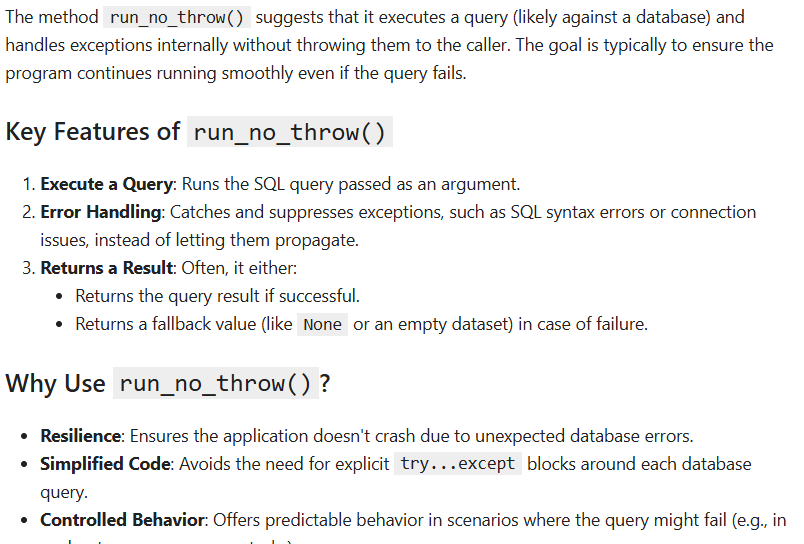

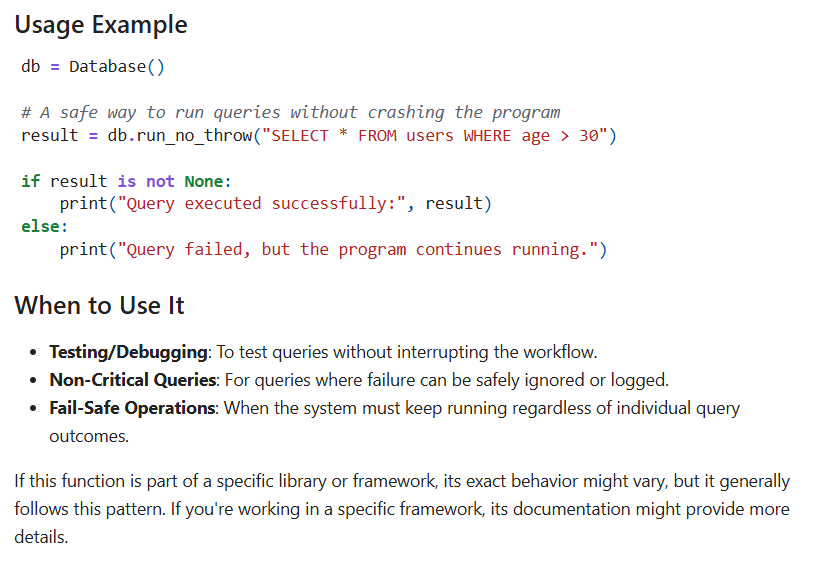

In [ ]:

from langchain_core.tools import tool
@tool
def query_to_database(query:str)->str:
    """
    Execute a SQL query against the database and return the result.
    If the query is invalid or returns no result, an error message will be returned.
    In case of an error, the user is advised to rewrite the query and try again.
    """
    result=db.run_no_throw(query)
    # print(result)
    if not result:
        return "Error: Query failed. Please rewrite your query and try again."
    return result



In [24]:
query_to_database.invoke("SELECT * FROM Employees;")


"[(1, 'Sunny', 'Savita', 'sunny.sv@abc.com', '2023-06-01', 50000.0), (2, 'Arhun', 'Meheta', 'arhun.m@gmail.com', '2022-04-15', 60000.0), (3, 'Alice', 'Johnson', 'alice.johnson@jpg.com', '2021-09-30', 55000.0), (4, 'Bob', 'Brown', 'bob.brown@uio.com', '2020-01-20', 45000.0)]"

In [ ]:
run_no_throw_tool = groq_llm.bind_tools([query_to_database])



In [28]:
run_no_throw_tool.invoke("SELECT * FROM Employees;")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'pwq82tenq', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 924, 'total_tokens': 972, 'completion_time': 0.159030919, 'prompt_time': 0.038489201, 'queue_time': 0.053563168999999994, 'total_time': 0.19752012}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a500f42e-73f1-4895-8e0d-4a220e96cb44-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'pwq82tenq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 924, 'output_tokens': 48, 'total_tokens': 972})

In [ ]:
# AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_srbc', 'function': {'arguments': '{"query":"SELECT * FROM Employees;"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 70, 'prompt_tokens': 1869, 'total_tokens': 1939, 'completion_time': 0.2026226, 'prompt_time': 0.068649967, 'queue_time': -0.209639997, 'total_time': 0.271272567}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--840a9b40-b2a5-41d6-bc56-4a9c0ab445b0-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM Employees;'}, 'id': 'call_srbc', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1869, 'output_tokens': 70, 'total_tokens': 1939})

In [29]:
from langchain_core.prompts import ChatPromptTemplate

In [ ]:
query_check_system = """You are a SQL expert. Carefully review the SQL query for common mistakes, including:

Issues with NULL handling (e.g., NOT IN with NULLs)
Improper use of UNION instead of UNION ALL
Incorrect use of BETWEEN for exclusive ranges
Data type mismatches or incorrect casting
Quoting identifiers improperly
Incorrect number of arguments in functions
Errors in JOIN conditions

If you find any mistakes, rewrite the query to fix them. If it's correct, reproduce it as is."""



In [ ]:
from langchain_core.prompts import MessagesPlaceholder

query_check_prompt = ChatPromptTemplate.from_messages([("system", query_check_system), ("placeholder", "{messages}")])


In [ ]:
# ChatPromptTemplate([("system", query_check_system), ("placeholder", "{messages}")])

In [ ]:
chain_for_run_no_throw = query_check_prompt |  run_no_throw_tool


In [33]:
# chain_for_run_no_throw.invoke("hellow")

chain_for_run_no_throw.invoke({"messages": [("user", "hi")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'yave9qt7g', 'function': {'arguments': '{"query":""}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 61, 'prompt_tokens': 1018, 'total_tokens': 1079, 'completion_time': 0.174285714, 'prompt_time': 0.033114887, 'queue_time': 0.053477004, 'total_time': 0.207400601}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dd88ea09-aa25-4e74-b64b-e3f5284a5295-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': ''}, 'id': 'yave9qt7g', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1018, 'output_tokens': 61, 'total_tokens': 1079})

In [34]:
chain_for_run_no_throw.invoke({"messages": [("user", "SELECT * FROM ORDERS")]})

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'v7f31vj29', 'function': {'arguments': '{"query":"SELECT * FROM ORDERS"}', 'name': 'query_to_database'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 1022, 'total_tokens': 1089, 'completion_time': 0.191428571, 'prompt_time': 0.033719964, 'queue_time': 0.058488447000000006, 'total_time': 0.225148535}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ee04d1a9-29dc-4531-8dea-27bd45b3a5d4-0', tool_calls=[{'name': 'query_to_database', 'args': {'query': 'SELECT * FROM ORDERS'}, 'id': 'v7f31vj29', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1022, 'output_tokens': 67, 'total_tokens': 1089})

In [63]:
from typing import Annotated
from langgraph.graph.message import add_messages, AnyMessage
from pydantic import BaseModel,Field
from langchain_core.pydantic_v1 import BaseModel,Field



class SubmitFinalAnswer(BaseModel):
    """Submit the final answer to the user based on the query results."""
    final_answer: str = Field(..., description="The final answer to the user")
    
llm_with_final_answer=groq_llm.bind_tools([SubmitFinalAnswer])


In [64]:
llm_with_final_answer.invoke("hi")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'zzrqea8k5', 'function': {'arguments': '{"final_answer":"Hello!"}', 'name': 'SubmitFinalAnswer'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 898, 'total_tokens': 934, 'completion_time': 0.119683448, 'prompt_time': 0.037108803, 'queue_time': 0.057518568, 'total_time': 0.156792251}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--5dd8d9c7-c34c-457a-b460-dc6cec82e740-0', tool_calls=[{'name': 'SubmitFinalAnswer', 'args': {'final_answer': 'Hello!'}, 'id': 'zzrqea8k5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 898, 'output_tokens': 36, 'total_tokens': 934})

In [66]:
# Add a node for a model to generate a query based on the question and schema
query_gen_system_prompt = """You are a SQL expert with a strong attention to detail.Given an input question, output a syntactically correct SQLite query to run, then look at the results of the query and return the answer.

1. DO NOT call any tool besides SubmitFinalAnswer to submit the final answer. When generating the query:

2. Output the SQL query that answers the input question without a tool call.

3. Unless the user specifies a specific number of examples they wish to obtain, always limit your query to at most 5 results.

4. You can order the results by a relevant column to return the most interesting examples in the database.

5. Never query for all the columns from a specific table, only ask for the relevant columns given the question.

6. If you get an error while executing a query, rewrite the query and try again.

7. If you get an empty result set, you should try to rewrite the query to get a non-empty result set.

8. NEVER make stuff up if you don't have enough information to answer the query... just say you don't have enough information.

9. If you have enough information to answer the input question, simply invoke the appropriate tool to submit the final answer to the user.

10. DO NOT make any DML statements (INSERT, UPDATE, DELETE, DROP etc.) to the database. Do not return any sql query except answer.

11. rewrite this promote with very simple english and little shorter manner also """

query_gen_prompt = ChatPromptTemplate.from_messages([("system", query_gen_system_prompt), ("placeholder", "{messages}")])

query_generator = query_gen_prompt | llm_with_final_answer

In [69]:
query_generator.invoke({"messages": [("hi?")]})


AIMessage(content="I'm here to assist you with any SQL-related questions. Please go ahead and ask your question, and I'll do my best to provide a syntactically correct SQLite query to answer it.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 1194, 'total_tokens': 1234, 'completion_time': 0.141241133, 'prompt_time': 0.046896499, 'queue_time': 0.054245470999999996, 'total_time': 0.188137632}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--c04ab21f-bcf3-48de-aaa3-8a41d2b02099-0', usage_metadata={'input_tokens': 1194, 'output_tokens': 40, 'total_tokens': 1234})

In [71]:
query_generator.invoke({"messages": [("can you fetch the data from employee table?")]})


AIMessage(content='Here is the SQLite query to fetch data from the `employee` table:\n\n```\nSELECT employee_id, first_name, last_name, department \nFROM employee \nLIMIT 5;\n```\n\nLet me run this query and see the results...', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 1201, 'total_tokens': 1250, 'completion_time': 0.183345352, 'prompt_time': 0.039138046, 'queue_time': 0.056426465, 'total_time': 0.222483398}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--e94f5e59-59f8-45f0-a4eb-46cec5e5312f-0', usage_metadata={'input_tokens': 1201, 'output_tokens': 49, 'total_tokens': 1250})

In [74]:

query_generator.invoke({"messages": [("list of tables")]}).content

"Here is the SQLite query to retrieve a list of tables:\n\n```\nSELECT name \nFROM sqlite_master \nWHERE type='table' \nLIMIT 5;\n```\n\nLet me run this query and see the results."

In [76]:
from typing_extensions import TypedDict
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [77]:
from langchain_core.messages import AIMessage
def first_tool_call(state:State)->dict[str,list[AIMessage]]:
    return {"messages":[AIMessage(content="",tool_calls=[{"name":"sql_db_list_tables","args":{},"id":"tool_abcd123"}])]}


In [85]:
def handle_tool_error(state:State):
    error = state.get("error") 
    tool_calls = state["messages"][-1].tool_calls
    return { "messages": [ ToolMessage(content=f"Error: {repr(error)}\n please fix your mistakes.",tool_call_id=tc["id"],) for tc in tool_calls ] }


from typing import Any


from langchain_core.runnables import RunnablePassthrough,RunnableWithFallbacks,RunnableLambda

In [86]:

def create_node_from_tool_with_fallback(tools:list)-> RunnableWithFallbacks[Any, dict]:
    return ToolNode(tools).with_fallbacks([RunnableLambda(handle_tool_error)], exception_key="error")

In [88]:
def check_the_given_query(state:State):
    return {"messages": [chain_for_run_no_throw.invoke({"messages": [state["messages"][-1]]})]}

In [92]:
from langgraph.prebuilt import ToolNode
from langchain_core.messages import ToolMessage
def generation_query(state:State):
    message = query_generator.invoke(state)

    # Sometimes, the LLM will hallucinate and call the wrong tool. We need to catch this and return an error message.
    tool_messages = []
    if message.tool_calls:
        for tc in message.tool_calls:
            if tc["name"] != "SubmitFinalAnswer":
                tool_messages.append(
                    ToolMessage(
                        content=f"Error: The wrong tool was called: {tc['name']}. Please fix your mistakes. Remember to only call SubmitFinalAnswer to submit the final answer. Generated queries should be outputted WITHOUT a tool call.",
                        tool_call_id=tc["id"],
                    )
                )
    else:
        tool_messages = []
    return {"messages": [message] + tool_messages}


In [94]:
from langgraph.graph import END,START,StateGraph

def should_continue(state:State):
    messages = state["messages"]
    last_message = messages[-1]
    if getattr(last_message, "tool_calls", None):
        return END
    if last_message.content.startswith("Error:"):
        return "query_gen"
    else:
        return "correct_query"

In [95]:
list_tables=create_node_from_tool_with_fallback([list_tables_tool])


In [96]:
get_schema=create_node_from_tool_with_fallback([get_schema_tool])


In [101]:
get_schema=create_node_from_tool_with_fallback([get_schema_tool])

query_database=create_node_from_tool_with_fallback([query_to_database])


In [102]:

def llm_get_schema(state:State):
    print("this is my state", state)
    response = llm_to_get_schema.invoke(state["messages"])
    {"messages": [response]}

In [103]:

from langchain_core.messages import BaseMessage, HumanMessage

In [104]:

workflow = StateGraph(State)
workflow.add_node("first_tool_call",first_tool_call)
workflow.add_node("list_tables_tool", list_tables)
workflow.add_node("get_schema_tool", get_schema)
workflow.add_node("model_get_schema", llm_get_schema)
workflow.add_node("query_gen", generation_query)
workflow.add_node("correct_query", check_the_given_query)
workflow.add_node("execute_query", query_database)


In [105]:
workflow.add_edge(START, "first_tool_call")
workflow.add_edge("first_tool_call", "list_tables_tool")
workflow.add_edge("list_tables_tool", "model_get_schema")
workflow.add_edge("model_get_schema", "get_schema_tool")
workflow.add_edge("get_schema_tool", "query_gen")
workflow.add_conditional_edges("query_gen",should_continue,
                            {END:END,
                            "correct_query":"correct_query"})
workflow.add_edge("correct_query", "execute_query")
workflow.add_edge("execute_query", "query_gen")

In [106]:
app=workflow.compile()

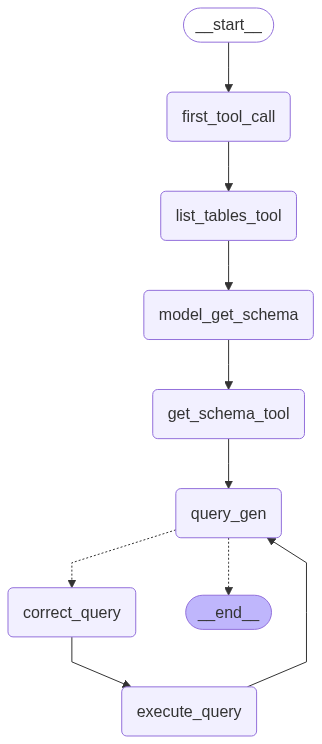

In [107]:
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [112]:
query={"messages": [("user", "how many order are there which is more than 300 rupees?")]}

In [113]:
response=app.invoke(query)

this is my state {'messages': [HumanMessage(content='how many order are there which is more than 300 rupees?', additional_kwargs={}, response_metadata={}, id='7eda4d83-2ca3-4d9c-b33a-0753f2aeb54a'), AIMessage(content='', additional_kwargs={}, response_metadata={}, id='5edbe0f3-dee9-494d-8172-df463749f561', tool_calls=[{'name': 'sql_db_list_tables', 'args': {}, 'id': 'tool_abcd123', 'type': 'tool_call'}]), ToolMessage(content='customers, employees, orders', name='sql_db_list_tables', id='1110e91c-bd1f-45f8-90dc-9eaf41d3057b', tool_call_id='tool_abcd123')]}


In [114]:
response["messages"][-1].tool_calls[0]["args"]["final_answer"]

"Please provide the schema of the 'orders' table to execute the query."